## HW03 Code


You will complete the following notebook, as described in the PDF for Homework 03 (included in the download with the starter code).  You will submit:
1. This notebook file, along with your COLLABORATORS.txt file, to the Gradescope link for code.
2. A PDF of this notebook and all of its output, once it is completed, to the Gradescope link for the PDF.


Please report any questions to the [class Piazza page](piazza.com/tufts/summer2021/cs135).

### Import required libraries.

In [20]:
import os
import numpy as np
import pandas as pd

import warnings

import sklearn.linear_model
import sklearn.metrics
import sklearn.calibration

import sklearn.preprocessing # added for part 4a

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn') # pretty matplotlib plots

### Function for later use
This function will compute and return a confusion matrix on data, given probabilistic predictions, and a threshold to use when converting probabilities to "firm" predictions.

***Don't change this function.***

In [3]:
def calc_confusion_matrix_for_threshold(ytrue_N, yproba1_N, thresh=0.5):
    ''' Compute the confusion matrix for a given probabilistic classifier and threshold
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yproba1_N : 1D array of floats
        Each entry represents a probability (between 0 and 1) that correct label is positive (1)
        One entry per example in current dataset
        Needs to be same size as ytrue_N
    thresh : float
        Scalar threshold for converting probabilities into hard decisions
        Calls an example "positive" if yproba1 >= thresh
        Default value reflects a majority-classification approach (class is the one that gets
        highest probability)

    Returns
    -------
    cm_df : Pandas DataFrame
        Can be printed like print(cm_df) to easily display results
    '''
    cm = sklearn.metrics.confusion_matrix(ytrue_N, yproba1_N >= thresh)
    cm_df = pd.DataFrame(data=cm, columns=[0, 1], index=[0, 1])
    cm_df.columns.name = 'Predicted'
    cm_df.index.name = 'True'
    return cm_df

## Cancer-Risk Screening

### 1: Compute true/false positives/negatives.

Complete the following code.

In [4]:
def calc_TP_TN_FP_FN(ytrue_N, yhat_N):
    '''
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yhat_N : 1D array of floats
        Each entry represents a predicted binary value (either 0 or 1).
        One entry per example in current dataset.
        Needs to be same size as ytrue_N.

    Returns
    -------
    TP : int
        Number of true positives
    TN : int
        Number of true negatives
    FP : int
        Number of false positives
    FN : int
        Number of false negatives
    '''
    
    if (len(ytrue_N) != len(yhat_N)):
        print("Vectors must be the same size")
        return 0.0, 0.0, 0.0, 0.0
    
    # initializing return variables
    TP = 0.0
    TN = 0.0
    FP = 0.0
    FN = 0.0   
    
    # iterating through lists to update return variables
    for i in range(len(ytrue_N)):
        if ytrue_N[i] == 1 and yhat_N[i] == 1:
            TP += 1
        elif ytrue_N[i] == 1 and yhat_N[i] == 0:
            FN += 1 
        elif ytrue_N[i] == 0 and yhat_N[i] == 1:
            FP += 1 
        else:
            TN += 1
    
    return TP, TN, FP, FN

#### Testing code
The following four calls to the function above test your results.  ***Don't modify this.***

In [5]:
all0 = np.zeros(10)
all1 = np.ones(10)
calc_TP_TN_FP_FN(all0, all1)

(0.0, 0.0, 10.0, 0.0)

In [6]:
calc_TP_TN_FP_FN(all1, all0)

(0.0, 0.0, 0.0, 10.0)

In [7]:
calc_TP_TN_FP_FN(all1, all1)

(10.0, 0.0, 0.0, 0.0)

In [8]:
calc_TP_TN_FP_FN(all0, all0)

(0.0, 10.0, 0.0, 0.0)

### Load the dataset.

The following should ***not*** be modified.  After it runs, the various arrays it creates will contain the 2- or 3-feature input datasets.

In [9]:
# Load the x-data and y-class arrays
x_train = np.loadtxt('./data_cancer/x_train.csv', delimiter=',', skiprows=1)
x_test = np.loadtxt('./data_cancer/x_test.csv', delimiter=',', skiprows=1)

y_train = np.loadtxt('./data_cancer/y_train.csv', delimiter=',', skiprows=1)
y_test = np.loadtxt('./data_cancer/y_test.csv', delimiter=',', skiprows=1)

### 2: Compute the fraction of patients with cancer.

Complete the following code.  Your solution needs to ***compute*** these values from the training and testing sets (i.e., don't simply hand-count and print the values).

In [10]:
def calc_positives(arr):
    '''
    
    Args
    ----
    arr : 1D array of floats
        Each entry represents the binary value (0 or 1)
        One entry per example in current dataset

    Returns
    -------
    fraction_of_positives : int
        Fraction of positives
    '''

    # calculating positives in training and testing data
    positives = 0
    for i in range(len(arr)):
        if(arr[i] == 1):
            positives += 1
    
    fraction_of_positives = positives / len(arr)
    return fraction_of_positives

print("Fraction of data that has_cancer on TRAIN: %.3f" % calc_positives(y_train))
print("fraction of data that has_cancer on TEST : %.3f" % calc_positives(y_test))

Fraction of data that has_cancer on TRAIN: 0.140
fraction of data that has_cancer on TEST : 0.139


### 3: The predict-0-always baseline

#### (a) Compute the accuracy of the always-0 classifier.

Complete the code to compute and print the accuracy of the always-0 classifier on validation and test outputs.

In [11]:
def predict_0_classifier(arr):
    '''
    
    Args
    ----
    arr : 1D array of floats
        Each entry represents the binary value (0 or 1)
        One entry per example in current dataset

    Returns
    -------
    fraction_of_negatives : int
        Fraction of negatives
    '''

    # calculating negatives in training and testing data
    # using calc_positives to calculate the fraction of negatives
    fraction_of_negatives = 1 - calc_positives(arr)
    return fraction_of_negatives

print("acc on TRAIN: %.3f" % predict_0_classifier(y_train)) 
print("acc on TEST : %.3f" % predict_0_classifier(y_test))

acc on TRAIN: 0.860
acc on TEST : 0.861


#### (b) Print a confusion matrix for the always-0 classifier.

Add code below to generate a confusion matrix for the always-0 classifier on the test set.

In [12]:
print("Confusion matrix for always-0 classifier:")
print(calc_confusion_matrix_for_threshold(y_test, np.zeros(len(y_test)), predict_0_classifier(y_test)))

Confusion matrix for always-0 classifier:
Predicted    0  1
True             
0          155  0
1           25  0


#### (c) Reflect on the accuracy of the always-0 classifier.

**Answer**: The always-0 classifier has a reasonable accuracy for the simple baseline classifier. 155 of the 180 labels have been accurately classified with a predicted output of 0 (true negatives), while the other 25 weren't (false negatives). The reason that we wouldn't just use it for this task is that we care more about the true positives. In our case, the performance should be based on how well we can determine that patients have cancer. Thus, the classifier's performance is not based on predicting true negatives, it is based on predicting true positives. This classifier could not predict any occurrences of cancer based on any combination of features, so therefore, it wouldn't be that useful.

#### (d) Analyze the various costs of using the always-0 classifier.


**Answer**: There are a few errors that the always-0 classifier can make. The worst error is that it is possible for the model to predict a false negative, which means that a patient with cancer would not be properly diagnosed. The cost of this mistake would lead to the patient's cancer growing and probably death. As a result, this model has a cost of death along with the patient's physical/emotional trauma that comes with it. Otherwise, the always-0 classifier does make a correct prediction since patients who do not have cancer are correctly predicted. However, a model that predicts the same result in every scenario is a bad model. As a result of these possible costs, I would recommend not using this model because it makes the mistake of not predicting people who have cancer properly.

### 4: Basic Perceptron Models

#### (a) Create a basic `Perceptron` classifier

Fit a perceptron to the training data.  Print out accuracy on this data, as well as on testing data.  Print out a confusion matrix on the testing data.

In [13]:
# combine training and testing data into array
x = np.vstack([x_train, x_test])

# transform training and testing with MinMax scalar to minimize difference in magnitudes (scale is between 0 and 1)
scalar = sklearn.preprocessing.MinMaxScaler()
scalar.fit(x)
x_train_transf = scaler.transform(x_train)
x_test_transf = scaler.transform(x_test)
    
# create perceptron, fit data, return score
basic_perc = sklearn.linear_model.Perceptron(tol=1e-3, random_state=0)
basic_perc.fit(x_train_transf, y_train)

# print accuracy on data
print("acc on TRAIN: %.3f" % basic_perc.score(x_train_transf, y_train)) #TODO: modify these values
print("acc on TEST : %.3f" % basic_perc.score(x_test_transf, y_test))

# print confusion matrix
print()
print(calc_confusion_matrix_for_threshold(y_test, basic_perc.predict(x_test_transf)))

NameError: name 'scaler' is not defined

#### (b) Compare the `Perceptron` to the always-0 classifier.

**Answer**: The Perceptron model has a much lower accuracy on the training and testing data than the always-0 classifier. However, the always-0 classifier results in a lot of false negatives (25), which is really bad because it could lead to the death of those patients. The Perceptron Model has 0 false negatives, and instead 91 false positives, which is not completely accurate, but it is better to think you have cancer when you don't thatn to think you don't have cancer when you do. Therefore, the cost of the always 0 classifier is much worse than the Perceptron, even if the Perceptron is less accurate.


#### (c) Generate a series of regularized perceptron models
Each model will use a different `alpha` value, multiplying that by the L2 penalty.  You will record and plot the accuracy of each model on both training and test data.

In [277]:
# initialize accuracy lists
train_accuracy_list = list()
test_accuracy_list = list()

# generate values of alpha
alphas = np.logspace(-5, 5, base=10, num=100)
    
for alpha in range(len(alphas)):
        
    # fit preceptron model with alpha
    regular_perc = sklearn.linear_model.Perceptron(penalty='l2', alpha= alphas[alpha], tol=1e-3, random_state=0)
    regular_perc.fit(x_train_transf, y_train)
        
    # append to accuracy lists
    train_accuracy_list.append(regular_perc.score(x_train_transf, y_train))
    test_accuracy_list.append(regular_perc.score(x_test_transf, y_test))

##### Plot accuracy on train/test data across the different alpha values.

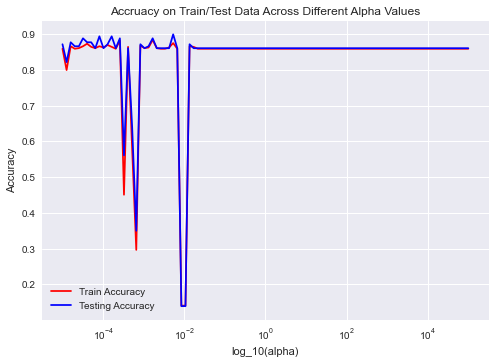

In [278]:
# plotting accuracy on train/test
plt.xscale('log')

plt.plot(alphas, train_accuracy, color="red", label="Train Accuracy")
plt.plot(alphas, test_accuracy, color="blue", label="Testing Accuracy")

plt.title("Accruacy on Train/Test Data Across Different Alpha Values")
plt.xlabel('log_10(alpha)');
plt.ylabel('Accuracy');

plt.legend()
plt.show()

# TODO add legend, titles, etc.
# plt.legend(...);

#### (d) Discuss what the plot is showing you.

**Answer**: The plot is showing me that for the most part, the training and testing accuracy are around 0.85 and 0.86 respectively. However, there are few alpha values that cause the accuracy for both to dip. Around alpha value 10^-3, the testing accuracy decreases below 0.6 and the training accuracy decreases below 0.5. Around 10^-2, both accuracies fall all the way to 0.15. Compared to prior assignments, this plot starts off with small fluctuations, followed by big fluctuations, but then stays relatively flat.

### 5: Decision functions and probabilistic predictions

#### (a) Create two new sets of predictions

Fit `Perceptron` and `CalibratedClassifierCV` models to the data.  Use their predictions to generate ROC curves. 

In [279]:
# build a CalibratedClassifierCV, using a Perceptron as its base_estimator, 
#       and generate its probabilistic predictions over the test data.
perc1 = sklearn.linear_model.Perceptron(tol=1e-3, random_state=0)
calibrate = sklearn.calibration.CalibratedClassifierCV(base_estimator = perc1, method = "isotonic")
calibrate.fit(x_train_transf, y_train)
temp_prob_scores = calibrate.predict_proba(x_test_transf)
prob_scores = temp_prob_scores[:, 1]

# fit a Perceptron and generate its confidence scores with decision_function() over the test data.
perc2 = sklearn.linear_model.Perceptron(tol=1e-3, random_state=0)
perc2.fit(x_train_transf, y_train)
perc_scores = perc2.decision_function(x_test_transf)

In [1]:
# Graph models (ROC) to compare
# Using sklearn.metrics.roc_curve(y_test, confidence_scores1)
fpr1, tpr1, thresholds1 = sklearn.metrics.roc_curve(y_test, prob_scores)
fpr2, tpr2, thresholds2 = sklearn.metrics.roc_curve(y_test, perc_scores)
print(fpr1)
print(tpr1)
print(thresholds1)

plt.title("ROC Curves on Perceptron Model and CCCV Model")
plt.plot(fpr1, tpr1, color="blue", label="CCCV/Probabilistic Model")
plt.plot(fpr2, tpr2, color="red", label="Perceptron Model")

plt.ylim([0, 1]);
plt.xlabel("False Postive rate (FPR)");
plt.ylabel("True Postive rate (TPR)");

plt.legend()
plt.show()

NameError: name 'sklearn' is not defined

In [281]:
# finding auc for both models
auc1 = sklearn.metrics.roc_auc_score(y_test, prob_scores)
auc2 = sklearn.metrics.roc_auc_score(y_test, perc_scores)

print("AUC on TEST for Perceptron Model: %.3f" % auc2) #TODO: modify these values
print("AUC on TEST for Probabilistic Model: %.3f" % auc1)

AUC on TEST for Perceptron Model: 0.884
AUC on TEST for Probabilistic Model: 0.886


#### (b) Discuss the results above

**Answer**: The ROC Curves in the plot and the AUC values tell us a lot. 

ROC curves are a way to look at classifier performance and look at the ratio of true positive rates and false positive rates. The Perceptron model ROC curve shows that for low false positive rates, the true positive rate is fairly high (other than close to 0). As false positive rates get higher, the true positive rate approaches 1, and it finally does this at a false positive rate at 0.5. Similarly, the Probabilistic Model ROC curve shows that for low false positive rates, the true positive rate is fairly high, maybe a little lower than the Perceptron Model. However, the Probabilistic Model reaches a true positive rate of 1.0 at lower false positive rate (0.4) than the Perceptron Model.

Sometimes, ROC can ve nuanced and the curve does not tell us how the algorithm performed. The areas under the curves (AUC) is a good metric for performance. A larger area means the curve gets higher true positive success rate earlier. Thus, we see that the AUC for testing of the perceptron is very high (0.884) as well as the AUC for testing of the Probabilistic Model (0.886). Thus, this means that the Probabilistic Model gets a higher true positive success rate earlier than the Perceptron Model, but it's relatively close.

#### (c) Compute model metrics for different probabilistic thresholds

Complete the function that takes in a set of correct outputs, a matching set of probabilities generated by a classifier, and a threshold at which to set the positive decision probability, and returns a set of metrics if we use that threshold.

In [282]:
def calc_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh=0.5):
    ''' Compute performance metrics for a given probabilistic classifier and threshold
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yproba1_N : 1D array of floats
        Each entry represents a probability (between 0 and 1) that correct label is positive (1)
        One entry per example in current dataset
        Needs to be same size as ytrue_N
    thresh : float
        Scalar threshold for converting probabilities into hard decisions
        Calls an example "positive" if yproba1 >= thresh
        Default value reflects a majority-classification approach (class is the one that gets
        highest probability)

    Returns
    -------
    acc : accuracy of predictions
    tpr : true positive rate of predictions
    tnr : true negative rate of predictions
    ppv : positive predictive value of predictions
    npv : negative predictive value of predictions
    '''

    # TODO: fix this
    
    # calculating true/false positives/negatives
    TP, TN, FP, FN = calc_TP_TN_FP_FN(ytrue_N, yproba1_N >= thresh)
    
    acc = (TP + TN) / float(TP + TN + FP + FN + 1e-10)
    tpr = TP / float(TP + FN + 1e-10)
    tnr = TN / float(TN + FP + 1e-10)
    ppv = TP / float(TP + FP + 1e-10)
    npv = TN / float(TN + FN + 1e-10)
    
    return acc, tpr, tnr, ppv, npv

# You can use this function later to make printing results easier; don't change it.
def print_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh=0.5):
    ''' Pretty print perf. metrics for a given probabilistic classifier and threshold
    '''
    acc, tpr, tnr, ppv, npv = calc_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh)
    
    ## Pretty print the results
    print("%.3f ACC" % acc)
    print("%.3f TPR" % tpr)
    print("%.3f TNR" % tnr)
    print("%.3f PPV" % ppv)
    print("%.3f NPV" % npv)

#### (d) Compare the probabilistic classifier across multiple decision thresholds

Try a range of thresholds for classifying data into the positive class (1).  For each threshold, compute the true postive rate (TPR) and positive predictive value (PPV).  Record the best value of each metric, along with the threshold that achieves it, and the *other* metric at that threshold.

In [283]:
# initialize thresholds
thresholds = np.linspace(0, 1.001, 51)

#initialize best TPR and PPV variables
best_TPR = 0
best_PPV_for_best_TPR = 0
best_TPR_threshold = 0

best_PPV = 0
best_TPR_for_best_PPV = 0  
best_PPV_threshold = 0

for magnitude in range(len(thresholds)):

    # calculate metrics
    acc, tpr, tnr, ppv, npv = calc_perf_metrics_for_threshold(y_test, prob_scores, thresholds[magnitude])
    
    # update best TPR
    if(tpr >= best_TPR): 
        if((tpr > best_TPR) or (ppv > best_PPV_for_best_TPR)):
            best_TPR = tpr
            best_PPV_for_best_TPR = ppv
            best_TPR_threshold = thresholds[magnitude]
    
    # update best PPB
    if(ppv >= best_PPV):
        if((ppv > best_PPV) or (tpr > best_TPR_for_best_PPV)):
            best_PPV = ppv
            best_TPR_for_best_PPV = tpr 
            best_PPV_threshold = thresholds[magnitude]
    

In [284]:
print("TPR threshold: %.4f => TPR: %.4f; PPV: %.4f" % (best_TPR_threshold, best_TPR, best_PPV_for_best_TPR))
print("PPV threshold: %.4f => PPV: %.4f; TPR: %.4f" % (best_PPV_threshold, best_PPV, best_TPR_for_best_PPV))

TPR threshold: 0.0601 => TPR: 1.0000; PPV: 0.2778
PPV threshold: 0.6206 => PPV: 1.0000; TPR: 0.2000


#### (e) Exploring diffrerent thresholds

#### (i) Using default 0.5 threshold. 

Generate confusion matrix and metrics for probabilistic classifier, using threshold 0.5.

In [285]:
best_thr = 0.5
print("ON THE TEST SET:")
print("Chosen best threshold = %.4f" % best_thr)
print("")
print(calc_confusion_matrix_for_threshold(y_test, prob_scores, best_thr))
print("")
print_perf_metrics_for_threshold(y_test, prob_scores, best_thr)

ON THE TEST SET:
Chosen best threshold = 0.5000

Predicted    0   1
True              
0          150   5
1           15  10

0.889 ACC
0.400 TPR
0.968 TNR
0.667 PPV
0.909 NPV


#### (ii) Using threshold with highest TPR. 

Generate confusion matrix and metrics for probabilistic classifier, using threshold that maximizes TPR.

In [286]:
best_thr = best_TPR_threshold
print("ON THE TEST SET:")
print("Chosen best threshold = %.4f" % best_thr)
print("")
print(calc_confusion_matrix_for_threshold(y_test, prob_scores, best_thr))
print("")
print_perf_metrics_for_threshold(y_test, prob_scores, best_thr)

ON THE TEST SET:
Chosen best threshold = 0.0601

Predicted   0   1
True             
0          90  65
1           0  25

0.639 ACC
1.000 TPR
0.581 TNR
0.278 PPV
1.000 NPV


#### (iii) Using threshold with highest PPV. 

Generate confusion matrix and metrics for probabilistic classifier, using threshold that maximizes PPV.

In [289]:
best_thr = best_PPV_threshold
print("ON THE TEST SET:")
print("Chosen best threshold = %.4f" % best_thr)
print("")
print(calc_confusion_matrix_for_threshold(y_test, prob_scores, best_thr))
print("")
print_perf_metrics_for_threshold(y_test, prob_scores, best_thr)

ON THE TEST SET:
Chosen best threshold = 0.6206

Predicted    0  1
True             
0          155  0
1           20  5

0.889 ACC
0.200 TPR
1.000 TNR
1.000 PPV
0.886 NPV


#### (iv) Compare the confusion matrices from (a)–(c) to analyze the different thresholds.

**Answer**: The probabilistic classifier at threshold 0.5 has a fairly high accuracy (0.889). 
While it has low TPR (0.400) and PPV (0.667), it has high TNR (0.968) and NPV (0.909). 
With low TPR and PPV, the effects would mean that 15 patients with cancer would not have their cancer detected (false negative) and 5 patients without cancer would be diagnosed with it (false positive), which is pretty bad even though it is not a lot.

The probabilistic classifier at threshold 0.06 has a medium accuracy (0.639), lower than threshold at 0.5. 
While it has low TNR (0.581) and PPV (0.278), which is much lower than the previous results, it has a perfect TNR (1.000) and NPV (1.00). 
A result of this would mean that there would be no false negatives (so no cancer would go undetected). However, there would be a good amount of cancer free patients that would get false positives. While it is better than a threshold of 0.5, it is still innaccurate.

The probabilistic classifier at threshold 0.62 has a fairly high accuracy (0.889), same as threshold 0.5. 
While it has lowest TPR we have seen (0.200), we see a fairly high NPV (0.886) and perfect TNR (1.0) and PPV (1.0). 
At this threshold, we have no false positives, but we do a have the most number of false negatives out of the three, which is realively bad.